   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9

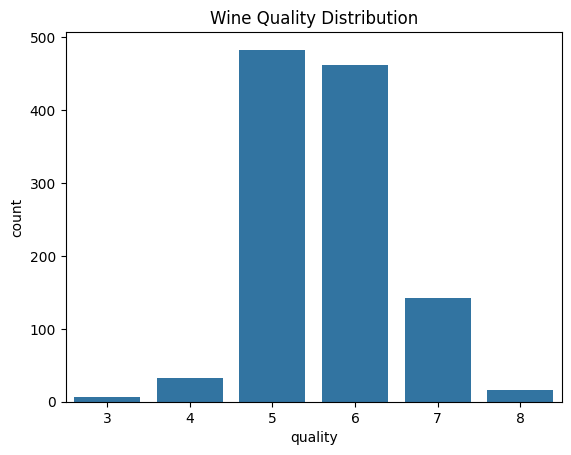

Model Accuracy: 0.777292576419214
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       102
           1       0.80      0.80      0.80       127

    accuracy                           0.78       229
   macro avg       0.77      0.77      0.77       229
weighted avg       0.78      0.78      0.78       229



In [12]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
df = pd.read_csv("/content/WineQT.csv")
print(df.head())
print(df.info())
print(df.describe())

# Step 3: Basic EDA
sns.countplot(x='quality', data=df)
plt.title("Wine Quality Distribution")
plt.show()

# Step 4: Feature Selection
X = df.drop("quality", axis=1)
y = df["quality"]

# Convert to binary classification (good vs bad)
y = np.where(y >= 6, 1, 0)

# Step 5: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Train Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Step 8: Evaluate Model
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc)
print(classification_report(y_test, y_pred))


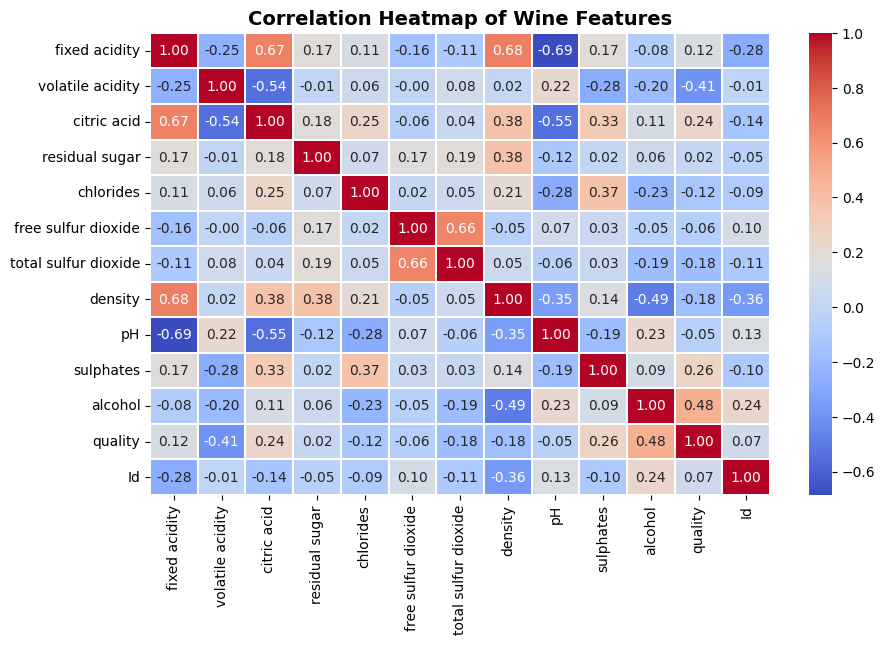

In [13]:
# Step 2: Visualization (EDA + Feature Insights)
import matplotlib.pyplot as plt
import seaborn as sns

# --- Correlation Heatmap (with values) ---
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.3)
plt.title("Correlation Heatmap of Wine Features", fontsize=14, fontweight="bold")
plt.show()





/tmp/ipython-input-645544974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='coolwarm')


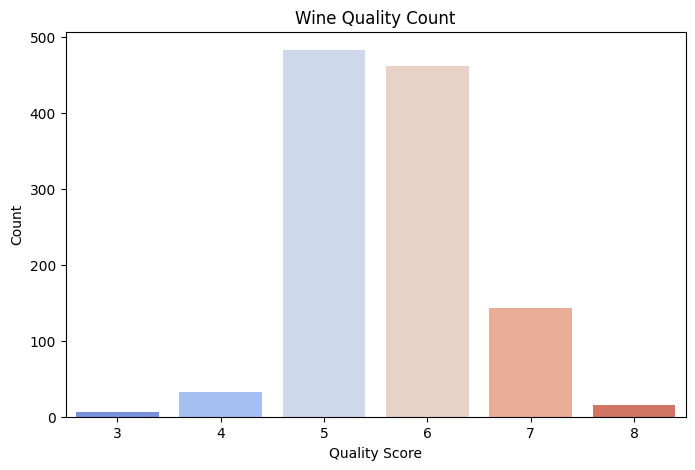

In [14]:
# --- 2️⃣ Quality Distribution ---
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=df, palette='coolwarm')
plt.title("Wine Quality Count")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-406199529.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='alcohol', data=df, palette='magma')


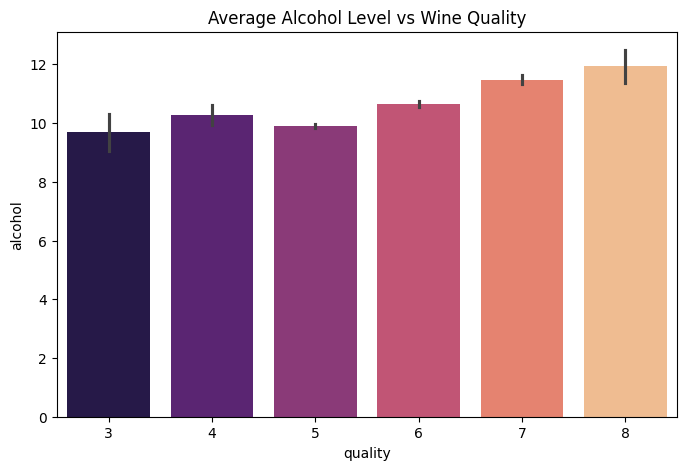

In [15]:
# --- 3️⃣ Alcohol vs Quality ---
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='alcohol', data=df, palette='magma')
plt.title("Average Alcohol Level vs Wine Quality")
plt.show()

/tmp/ipython-input-3412893803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=df, palette='viridis')


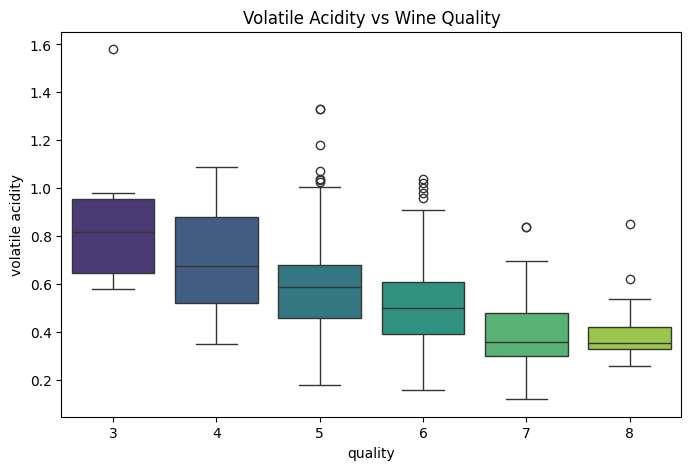

In [16]:

# --- 4️⃣ Volatile Acidity vs Quality ---
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='volatile acidity', data=df, palette='viridis')
plt.title("Volatile Acidity vs Wine Quality")
plt.show()

/tmp/ipython-input-1510401058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y='citric acid', data=df, palette='cubehelix')


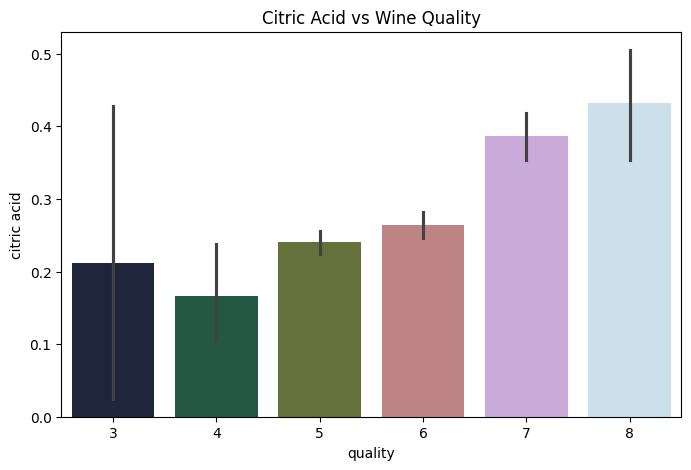

In [17]:
# --- 5️⃣ Citric Acid vs Quality ---
plt.figure(figsize=(8,5))
sns.barplot(x='quality', y='citric acid', data=df, palette='cubehelix')
plt.title("Citric Acid vs Wine Quality")
plt.show()

In [18]:
import joblib

# Save model and scaler
joblib.dump(model, "wine_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and Scaler saved successfully!")


✅ Model and Scaler saved successfully!


In [20]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.9 MB/s eta 0:00:00


In [21]:
import streamlit as st
import numpy as np
import joblib
from PIL import Image

# --- Page Config ---
st.set_page_config(
    page_title="🍷 AI Wine Quality Prediction",
    page_icon="🍇",
    layout="centered"
)

# --- Custom CSS for background & styling ---
st.markdown("""
    <style>
        /* Background Gradient */
        .stApp {
            background: linear-gradient(to bottom right, #2E0249, #570A57, #A91079);
            color: white;
            font-family: 'Poppins', sans-serif;
        }
        /* Title */
        h1, h2, h3 {
            color: #F9F9F9;
            text-align: center;
            font-weight: 700;
        }
        /* Subtitle text */
        .subtitle {
            text-align: center;
            color: #EAEAEA;
            font-size: 18px;
        }
        /* Button Styling */
        .stButton>button {
            background-color: #D91656;
            color: white;
            border-radius: 12px;
            height: 3em;
            width: 100%;
            font-size: 18px;
            font-weight: bold;
            border: 1px solid #FFB6C1;
            transition: 0.3s;
        }
        .stButton>button:hover {
            background-color: #FF6B81;
            color: black;
            transform: scale(1.02);
        }
        /* Input field style */
        .stNumberInput>div>div>input {
            border-radius: 10px;
            padding: 10px;
            font-size: 16px;
        }
        /* Footer */
        footer {
            text-align: center;
            color: #DDDDDD;
            font-size: 14px;
            margin-top: 30px;
        }
    </style>
""", unsafe_allow_html=True)

# --- Title Section ---
st.title("🍇 AI Wine Quality Prediction App")
st.markdown("<p class='subtitle'>Predict wine quality using Machine Learning and real chemical data 🍷</p>", unsafe_allow_html=True)

# --- Optional Banner Image ---
try:
    image = Image.open("/content/Wine Quality .jpg")
    st.image(image, use_container_width=True)
except:
    st.info("📸 Add a 'wine.jpg' banner to enhance your app visuals.")

# --- Load Model and Scaler ---
model = joblib.load("wine_model.pkl")
scaler = joblib.load("scaler.pkl")

# --- Input Section ---
st.markdown("<h3>🧪 Enter Wine Chemical Properties:</h3>", unsafe_allow_html=True)

col1, col2 = st.columns(2)

with col1:
    fixed_acidity = st.number_input("Fixed Acidity", 4.0, 15.0, 7.4)
    volatile_acidity = st.number_input("Volatile Acidity", 0.1, 1.5, 0.7)
    citric_acid = st.number_input("Citric Acid", 0.0, 1.0, 0.0)
    residual_sugar = st.number_input("Residual Sugar", 0.5, 15.0, 1.9)
    chlorides = st.number_input("Chlorides", 0.01, 0.20, 0.076)
    free_sulfur_dioxide = st.number_input("Free Sulfur Dioxide", 1.0, 70.0, 11.0)

with col2:
    total_sulfur_dioxide = st.number_input("Total Sulfur Dioxide", 6.0, 300.0, 34.0)
    density = st.number_input("Density", 0.9900, 1.0040, 0.9978)
    pH = st.number_input("pH", 2.5, 4.5, 3.51)
    sulphates = st.number_input("Sulphates", 0.3, 2.0, 0.56)
    alcohol = st.number_input("Alcohol", 8.0, 15.0, 9.4)

# --- Prediction Button ---
if st.button("🔍 Predict Wine Quality"):
    input_data = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides,
                            free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    st.markdown("<hr>", unsafe_allow_html=True)
    st.markdown("<h3>🍷 Prediction Result:</h3>", unsafe_allow_html=True)

    if prediction == 1:
        st.success(f"✅ This wine is **Good Quality!** (Confidence: {probability*100:.2f}%)")
        st.balloons()
        st.markdown("<p style='text-align:center; font-size:18px; color:#00FFB2;'>Cheers! This is a high-quality wine 🍾</p>", unsafe_allow_html=True)
    else:
        st.error(f"❌ This wine is **Low Quality.** (Confidence: {(1-probability)*100:.2f}%)")
        st.markdown("<p style='text-align:center; font-size:18px; color:#FFC3A0;'>May need some improvement in composition 🍇</p>", unsafe_allow_html=True)

st.markdown("<hr>", unsafe_allow_html=True)

# --- Footer ---
st.markdown("""
<footer>
    © 2025 | Developed by <b>Kumar GK</b> 🍇 | Powered by Machine Learning & Streamlit
    <br> #AI #DataScience #WineQualityPrediction #Streamlit
</footer>
""", unsafe_allow_html=True)


2025-11-08 10:02:11.297 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 10:02:11.301 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 10:02:12.042 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-08 10:02:12.048 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 10:02:12.052 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 10:02:12.057 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-08 10:02:12.064 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()